In [408]:
print("hello world")

hello world


In [409]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [464]:
cs_df = pd.read_csv('data/cs.csv')
cs_df

,academic_year,first_year,second_year,third_year,fourth_year,fifth_year
0,2018-2019,21131.22,21111.10,21091.00,21070.88,21070.46
1,2019-2020,23244.34,22187.78,22166.64,22145.54,22124.42
2,2020-2021,25568.76,23297.16,23274.96,23252.80,23230.64
3,2021-2022,28125.62,24462.00,24438.70,24415.44,24392.16
4,2022-2023,32344.46,29531.90,25685.10,25660.62,25636.20
5,2023-2024,33961.68,33961.68,31008.48,26969.34,26943.64


In [456]:
commerce_df = pd.read_csv('data/commerce.csv')
engineering_tech_df = pd.read_csv('data/engineering_technology.csv')
science_arts_health_df = pd.read_csv('data/health_appliedScience_arts_education_science_management.csv')
it_df = pd.read_csv('data/it.csv')
nursing_df = pd.read_csv('data/nursing_healthAdmin.csv')

In [412]:
commerce_df

,academic_year,first_year,second_year,third_year,fourth_year,fifth_year
0,2018-2019,22118.62,22013.30,21929.44,21907.82,NaN
1,2019-2020,24330.48,23224.54,23113.96,23025.90,NaN
2,2020-2021,26763.52,24385.76,24269.64,24177.18,NaN
3,2021-2022,29439.86,25605.04,25483.12,25386.02,NaN
4,2022-2023,32383.84,30911.84,26885.28,26757.26,NaN
5,2023-2024,34003.02,34003.02,32457.42,28229.54,NaN


In [413]:
commerce_df.fillna(0.0,inplace=True)

In [414]:
engineering_tech_df.fillna(0.0,inplace=True)

In [415]:
science_arts_health_df.fillna(0.0,inplace=True)
it_df.fillna(0.0,inplace=True)
nursing_df.fillna(0.0,inplace=True)

In [416]:
print(f"Commerce:\n{commerce_df.head(6)}\n")
print(f"Computer Science:\n{cs_df.head(6)}\n")
print(f"Engineering:\n{engineering_tech_df.head(6)}\n")
print(f"IT:\n{it_df.head(6)}\n")
print(f"Nursing:\n{nursing_df.head(6)}\n")
print(f"Sciences and health science:\n{science_arts_health_df.head(6)}\n")

Commerce:
  academic_year  first_year  second_year  third_year  fourth_year  fifth_year
0     2018-2019    22118.62     22013.30    21929.44     21907.82         0.0
1     2019-2020    24330.48     23224.54    23113.96     23025.90         0.0
2     2020-2021    26763.52     24385.76    24269.64     24177.18         0.0
3     2021-2022    29439.86     25605.04    25483.12     25386.02         0.0
4     2022-2023    32383.84     30911.84    26885.28     26757.26         0.0
5     2023-2024    34003.02     34003.02    32457.42     28229.54         0.0

Computer Science:
  academic_year  first_year  second_year  third_year  fourth_year  fifth_year
0     2018-2019    21131.22     21111.10    21091.00     21070.88    21070.46
1     2019-2020    23244.34     22187.78    22166.64     22145.54    22124.42
2     2020-2021    25568.76     23297.16    23274.96     23252.80    23230.64
3     2021-2022    28125.62     24462.00    24438.70     24415.44    24392.16
4     2022-2023    32344.46     295

In [473]:
df_concat = pd.concat((commerce_df,cs_df,engineering_tech_df,it_df,nursing_df,science_arts_health_df))
print(df_concat)

  Academic Year  First Year  Second Year  Third Year  Fourth Year  Fifth Year
0     2018-2019    22118.62     22013.30    21929.44     21907.82         NaN
1     2019-2020    24330.48     23224.54    23113.96     23025.90         NaN
2     2020-2021    26763.52     24385.76    24269.64     24177.18         NaN
3     2021-2022    29439.86     25605.04    25483.12     25386.02         NaN
4     2022-2023    32383.84     30911.84    26885.28     26757.26         NaN
5     2023-2024    34003.02     34003.02    32457.42     28229.54         NaN
0     2018-2019    21131.22     21111.10    21091.00     21070.88    21070.46
1     2019-2020    23244.34     22187.78    22166.64     22145.54    22124.42
2     2020-2021    25568.76     23297.16    23274.96     23252.80    23230.64
3     2021-2022    28125.62     24462.00    24438.70     24415.44    24392.16
4     2022-2023    32344.46     29531.90    25685.10     25660.62    25636.20
5     2023-2024    33961.68     33961.68    31008.48     26969.3

In [475]:
average_df = df_concat.loc[:,df_concat.columns != 'Academic Year'].groupby(level=0).mean().round(2).drop(["Fifth Year"],axis=1)
column_to_move = cs_df['Academic Year']
average_df.insert(0,'Academic Year',column_to_move)
print(average_df)

  Academic Year  First Year  Second Year  Third Year  Fourth Year
0     2018-2019    22103.88     22057.17    22012.15     21948.13
1     2019-2020    24314.27     23209.07    23160.02     23112.75
2     2020-2021    26745.68     24369.52    24313.51     24268.37
3     2021-2022    29420.24     25587.98    25533.90     25481.71
4     2022-2023    33141.21     30891.24    26867.38     26810.58
5     2023-2024    34466.53     33889.60    31343.82     27942.29


In [480]:
melted = average_df.melt(id_vars='Academic Year',value_name='cost',var_name='Standing Year')

   Academic Year Standing Year      cost
0      2018-2019    First Year  22103.88
1      2019-2020    First Year  24314.27
2      2020-2021    First Year  26745.68
3      2021-2022    First Year  29420.24
4      2022-2023    First Year  33141.21
5      2023-2024    First Year  34466.53
6      2018-2019   Second Year  22057.17
7      2019-2020   Second Year  23209.07
8      2020-2021   Second Year  24369.52
9      2021-2022   Second Year  25587.98
10     2022-2023   Second Year  30891.24
11     2023-2024   Second Year  33889.60
12     2018-2019    Third Year  22012.15
13     2019-2020    Third Year  23160.02
14     2020-2021    Third Year  24313.51
15     2021-2022    Third Year  25533.90
16     2022-2023    Third Year  26867.38
17     2023-2024    Third Year  31343.82
18     2018-2019   Fourth Year  21948.13
19     2019-2020   Fourth Year  23112.75
20     2020-2021   Fourth Year  24268.37
21     2021-2022   Fourth Year  25481.71
22     2022-2023   Fourth Year  26810.58
23     2023-2024

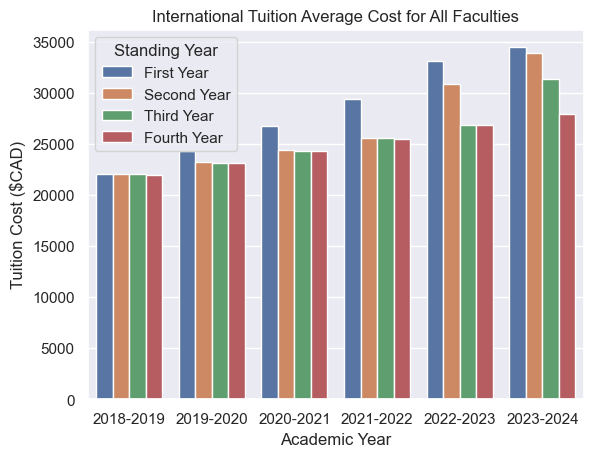

In [484]:
print(melted)
sns.barplot(data=melted, x='Academic Year', y='cost', hue='Standing Year')
#bar.set_ylim(40000)
plt.ylabel('Tuition Cost ($CAD)')
plt.title('International Tuition Average Cost for All Faculties')
plt.savefig('figures/all_cost.png',format='png')
plt.show()

In [420]:
pct_average_df = average_df
pct_average_df["first_year"] = average_df['first_year'].pct_change() * 100.0
pct_average_df['second_year'] = average_df['second_year'].pct_change() * 100.0
pct_average_df['third_year'] = average_df['third_year'].pct_change() * 100.0
pct_average_df['fourth_year'] = average_df['fourth_year'].pct_change() * 100.0
pct_average_df['average_percentage_change'] = pct_average_df.loc[:,pct_average_df.columns != 'academic_year'].mean(axis=1)

In [421]:
pct_average_df.fillna(0.00,inplace=True)
pct_average_df = pct_average_df.round(2)
pct_average_df

,academic_year,first_year,second_year,third_year,fourth_year,average_percentage_change
0,2018-2019,0.00,0.00,0.00,0.00,0.00
1,2019-2020,10.00,5.22,5.21,5.31,6.44
2,2020-2021,10.00,5.00,4.98,5.00,6.25
3,2021-2022,10.00,5.00,5.02,5.00,6.25
4,2022-2023,12.65,20.73,5.22,5.21,10.95
5,2023-2024,4.00,9.71,16.66,4.22,8.65


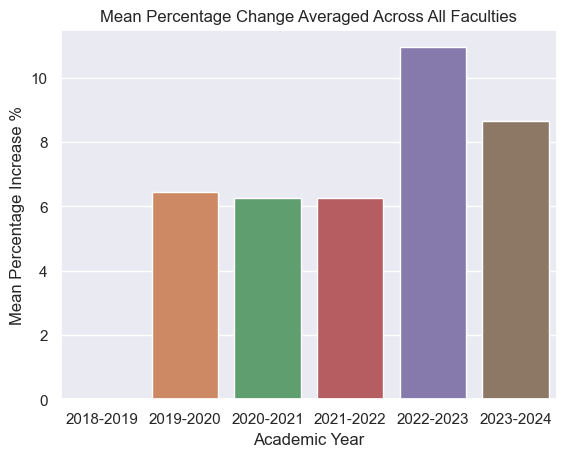

In [422]:
sns.barplot(data=pct_average_df,x='academic_year',y='average_percentage_change')
plt.xlabel('Academic Year')
plt.ylabel('Mean Percentage Increase %')
plt.title('Mean Percentage Change Averaged Across All Faculties')
plt.savefig('figures/mean_avg_pct.png',format='png')
plt.show()

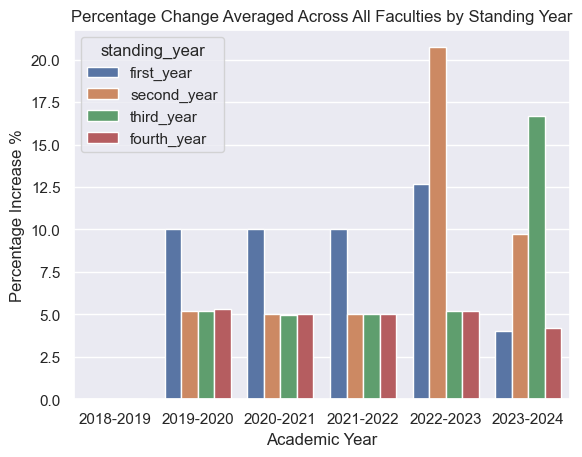

In [423]:
sns.barplot(data=pct_average_df.loc[:,pct_average_df.columns != 'average_percentage_change'].melt(id_vars='academic_year',value_name='percentage increase',var_name='standing_year'),x='academic_year',y='percentage increase',hue='standing_year')
plt.xlabel('Academic Year')
plt.ylabel('Percentage Increase %')
plt.title('Percentage Change Averaged Across All Faculties by Standing Year')
plt.savefig('figures/avg_pct_standing_year.png',format='png')
plt.show()

In [424]:
engineering_tech_df

,academic_year,first_year,second_year,third_year,fourth_year,fifth_year
0,2018-2019,26007.42,25982.66,25957.92,25710.68,25367.88
1,2019-2020,28608.16,27307.78,27281.78,27255.80,26996.20
2,2020-2021,31468.96,28673.16,28645.86,28618.58,28346.00
3,2021-2022,34615.84,30106.80,30078.14,30049.50,29763.30
4,2022-2023,39808.20,36346.62,31612.14,31582.04,31551.96
5,2023-2024,39808.20,36346.62,31612.14,31582.04,31551.96


In [425]:
print(it_df)
print(cs_df)

  academic_year  first_year  second_year  third_year  fourth_year  fifth_year
0     2018-2019    23091.20     23068.80    23046.40     22990.46         0.0
1     2019-2020    25400.32     24245.76    24222.24     24198.72         0.0
2     2020-2021    27940.34     25458.04    25433.34     25408.64         0.0
3     2021-2022    30734.36     26730.94    26705.00     26679.06         0.0
4     2022-2023    35344.50     32271.06    28067.48     28040.24         0.0
5     2023-2024    37111.72     37111.72    33884.60     29470.84         0.0
  academic_year  first_year  second_year  third_year  fourth_year  fifth_year
0     2018-2019    21131.22     21111.10    21091.00     21070.88    21070.46
1     2019-2020    23244.34     22187.78    22166.64     22145.54    22124.42
2     2020-2021    25568.76     23297.16    23274.96     23252.80    23230.64
3     2021-2022    28125.62     24462.00    24438.70     24415.44    24392.16
4     2022-2023    32344.46     29531.90    25685.10     25660.6

In [426]:
# cs_df.melt(id_vars='Academic Year',value_name='cost',var_name='Standing Year')

In [465]:
dfs = [commerce_df, cs_df, engineering_tech_df, science_arts_health_df, it_df, nursing_df]

for df in dfs:
    df.rename(columns={'academic_year':'Academic Year','first_year':'First Year','second_year':'Second Year','third_year':'Third Year','fourth_year':'Fourth Year','fifth_year':'Fifth Year'}, inplace=True)

In [467]:
commerce_df.drop('Fifth Year', axis=1, inplace=True)

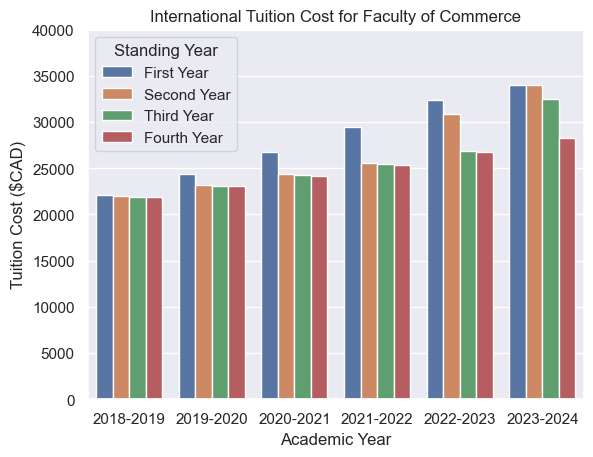

In [468]:
plot_commerce = sns.barplot(data=commerce_df.melt(id_vars='Academic Year',value_name='cost',var_name='Standing Year'),x='Academic Year',y='cost',hue='Standing Year')
plot_commerce.set_ylim(0,40000)
plt.ylabel('Tuition Cost ($CAD)')
plt.title('International Tuition Cost for Faculty of Commerce')
plt.savefig('figures/commerce_cost.png',format='png')
plt.show()

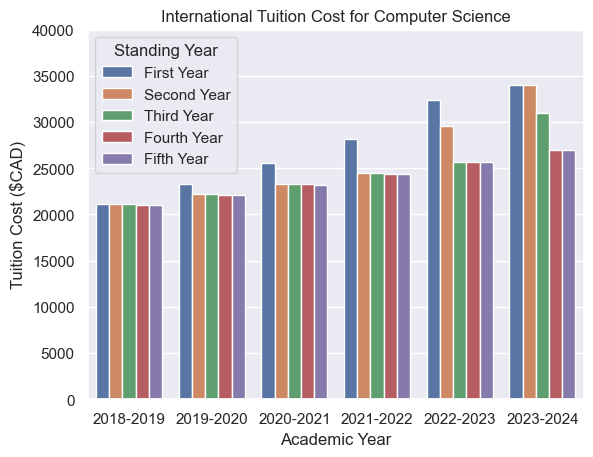

In [466]:
plot_cs = sns.barplot(data=cs_df.melt(id_vars='Academic Year',value_name='cost',var_name='Standing Year'),x='Academic Year',y='cost',hue='Standing Year')
plot_cs.set_ylim(0,40000)
plt.ylabel('Tuition Cost ($CAD)')
plt.title('International Tuition Cost for Computer Science')
plt.savefig('figures/cs_cost.png',format='png')
plt.show()

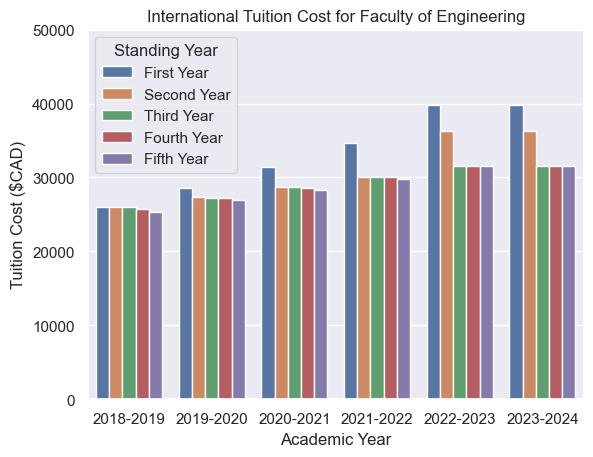

In [462]:
plot_eng = sns.barplot(data=engineering_tech_df.melt(id_vars='Academic Year',value_name='cost',var_name='Standing Year'),x='Academic Year',y='cost',hue='Standing Year')
plt.ylabel('Tuition Cost ($CAD)')
plt.title('International Tuition Cost for Faculty of Engineering')
plot_eng.set_ylim(0,50000)
plt.savefig('figures/eng_cost.png',format='png')
plt.show()

In [459]:
print(nursing_df)

  academic_year  first_year  second_year  third_year  fourth_year  fifth_year
0     2018-2019    20333.88     20314.14    20294.42     20274.70    20274.66
1     2019-2020    22367.26     21350.56    21329.84     21309.14         NaN
2     2020-2021    24603.98     22418.08    22369.32     22374.58         NaN
3     2021-2022    27064.36     23538.98    23516.12     23492.84         NaN
4     2022-2023    29770.78     28417.56    24715.92     24691.92         NaN
5     2023-2024    31259.30     31259.30    29838.42     25951.70         NaN


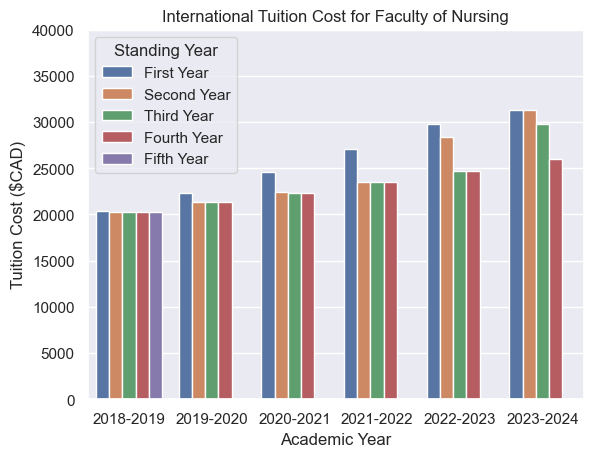

In [461]:
plot_nursing = sns.barplot(data=nursing_df.melt(id_vars='Academic Year',value_name='cost',var_name='Standing Year'),x='Academic Year',y='cost',hue='Standing Year')
plt.ylabel('Tuition Cost ($CAD)')
plt.title('International Tuition Cost for Faculty of Nursing')
plot_nursing.set_ylim(0,40000)
plt.savefig('figures/nursing_cost.png',format='png')
plt.show()

In [469]:
it_df.drop('Fifth Year', axis=1, inplace=True)

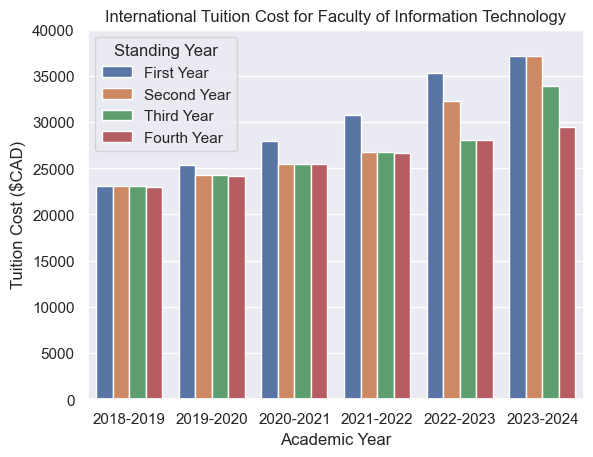

In [470]:
plot_it = sns.barplot(data=it_df.melt(id_vars='Academic Year',value_name='cost',var_name='Standing Year'),x='Academic Year',y='cost',hue='Standing Year')
plot_it.set_ylim(0,40000)
plt.ylabel('Tuition Cost ($CAD)')
plt.title('International Tuition Cost for Faculty of Information Technology')
plt.savefig('figures/it_cost.png',format='png')
plt.show()

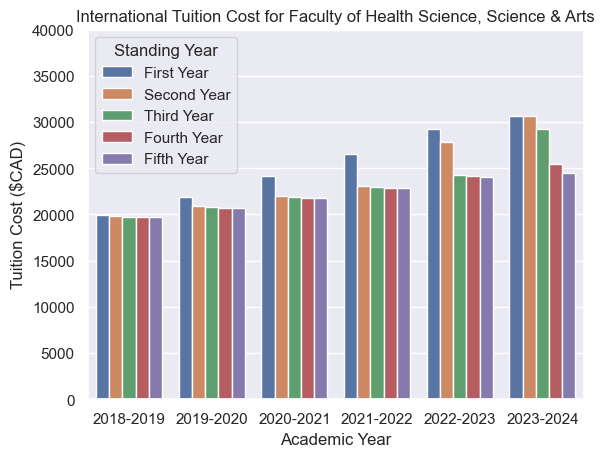

In [471]:
plot_health = sns.barplot(data=science_arts_health_df.melt(id_vars='Academic Year', value_name='cost', var_name='Standing Year'),x='Academic Year', y='cost', hue='Standing Year')
plot_health.set_ylim(0, 40000)
plt.ylabel('Tuition Cost ($CAD)')
plt.title('International Tuition Cost for Faculty of Health Science, Science & Arts')
plt.savefig('figures/health_cost.png',format='png')
plt.show()

In [434]:
pct_dfs = []
for df in dfs:
    pct_df = df
    for col in pct_df:
        if col != 'Academic Year':
            pct_df[col] = df[col].pct_change() * 100.0
    pct_df['Average Percentage Increase'] = pct_df.loc[:,pct_df.columns != 'Academic Year'].mean(axis=1)
    # print(pct_df)
    pct_dfs.append(pct_df)

In [435]:
commerce_pct_df = pct_dfs[0]
cs_pct_df = pct_dfs[1]
eng_pct_df = pct_dfs[2]
health_pct_df = pct_dfs[3]
it_pct_df = pct_dfs[4]
nursing_pct_df = pct_dfs[5]

In [451]:
commerce_pct_df.drop('Fifth Year',axis=1, inplace=True)
commerce_pct_df['Average Percentage Increase'] = commerce_pct_df.loc[:,it_pct_df.columns != 'Academic Year'].mean(axis=1)
commerce_pct_df

,Academic Year,First Year,Second Year,Third Year,Fourth Year,Average Percentage Increase
0,2018-2019,NaN,NaN,NaN,NaN,NaN
1,2019-2020,9.999991,5.502310,5.401506,5.103566,6.501843
2,2020-2021,9.999967,4.999970,4.999922,4.999935,6.249948
3,2021-2022,9.999955,4.999967,4.999992,4.999921,6.249959
4,2022-2023,9.999980,20.725607,5.502309,5.401556,10.407363
5,2023-2024,4.999963,9.999987,20.725616,5.502357,10.306981


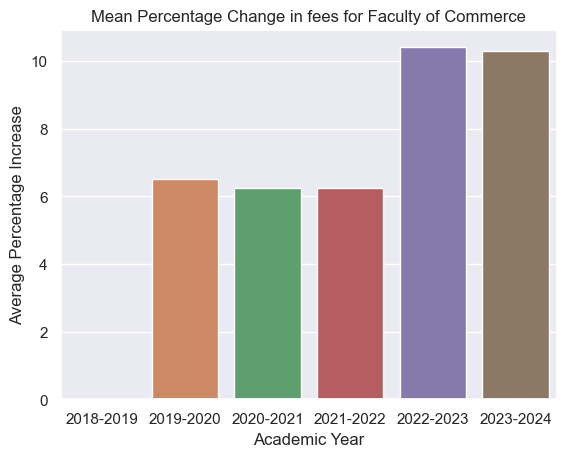

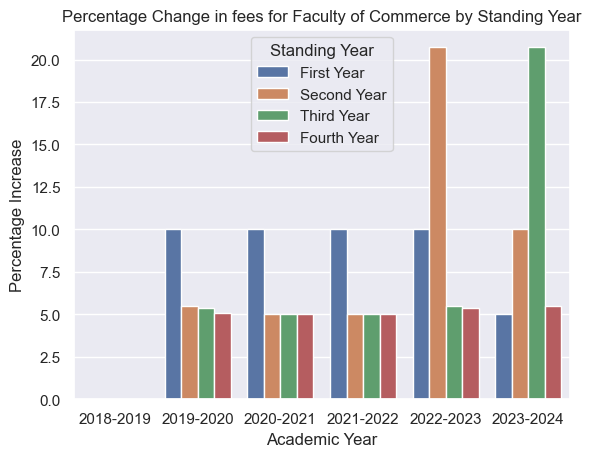

In [452]:
sns.barplot(data=commerce_pct_df,x='Academic Year',y='Average Percentage Increase')
plt.title("Mean Percentage Change in fees for Faculty of Commerce")
plt.savefig('figures/commerce_pct_avg.png',format='png')
plt.show()
sns.barplot(data=commerce_pct_df.loc[:,commerce_pct_df.columns != 'Average Percentage Increase'].melt(id_vars='Academic Year',value_name='Percentage Increase',var_name='Standing Year'),x='Academic Year',y='Percentage Increase',hue='Standing Year')
plt.title("Percentage Change in fees for Faculty of Commerce by Standing Year")
plt.savefig('figures/commerce_pct_standing.png',format='png')
plt.show()

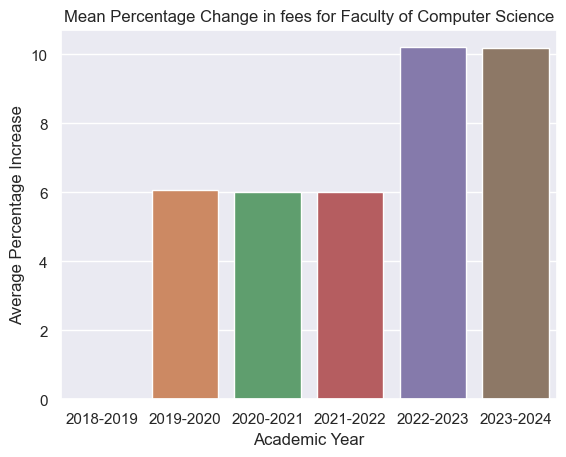

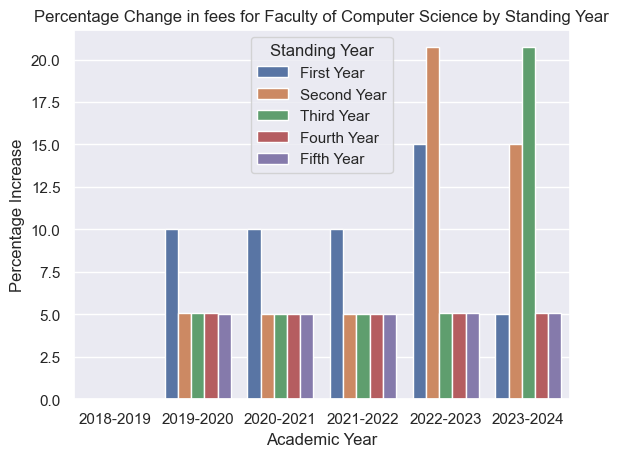

In [437]:
sns.barplot(data=cs_pct_df,x='Academic Year',y='Average Percentage Increase')
plt.title("Mean Percentage Change in fees for Faculty of Computer Science")
plt.savefig('figures/cs_pct_avg.png',format='png')
plt.show()
sns.barplot(data=cs_pct_df.loc[:,cs_pct_df.columns != 'Average Percentage Increase'].melt(id_vars='Academic Year',value_name='Percentage Increase',var_name='Standing Year'),x='Academic Year',y='Percentage Increase',hue='Standing Year')
plt.title("Percentage Change in fees for Faculty of Computer Science by Standing Year")
plt.savefig('figures/cs_pct_standing.png',format='png')
plt.show()

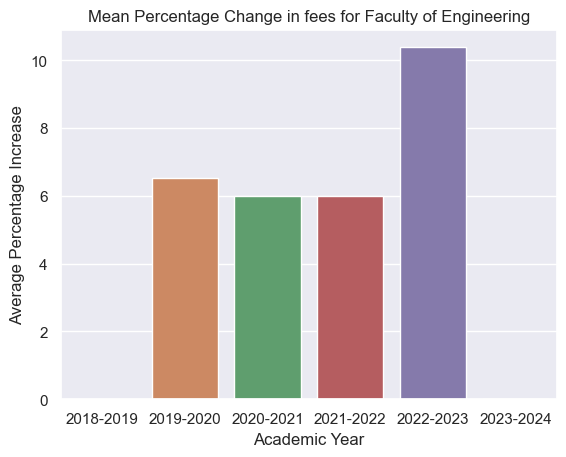

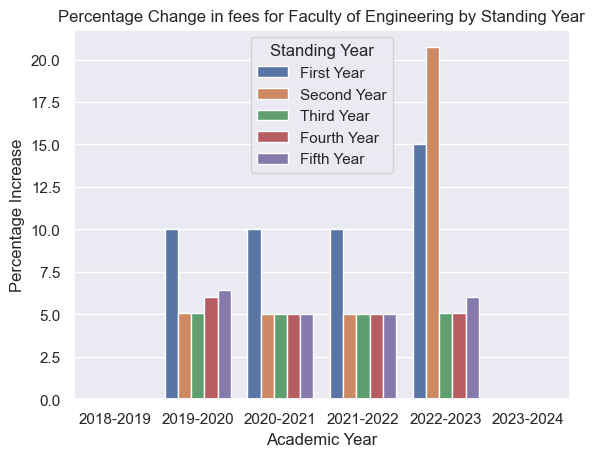

In [438]:
sns.barplot(data=eng_pct_df,x='Academic Year',y='Average Percentage Increase')
plt.title("Mean Percentage Change in fees for Faculty of Engineering")
plt.savefig('figures/eng_pct_avg.png',format='png')
plt.show()
sns.barplot(data=eng_pct_df.loc[:,eng_pct_df.columns != 'Average Percentage Increase'].melt(id_vars='Academic Year',value_name='Percentage Increase',var_name='Standing Year'),x='Academic Year',y='Percentage Increase',hue='Standing Year')
plt.title("Percentage Change in fees for Faculty of Engineering by Standing Year")
plt.savefig('figures/eng_pct_standing.png',format='png')
plt.show()

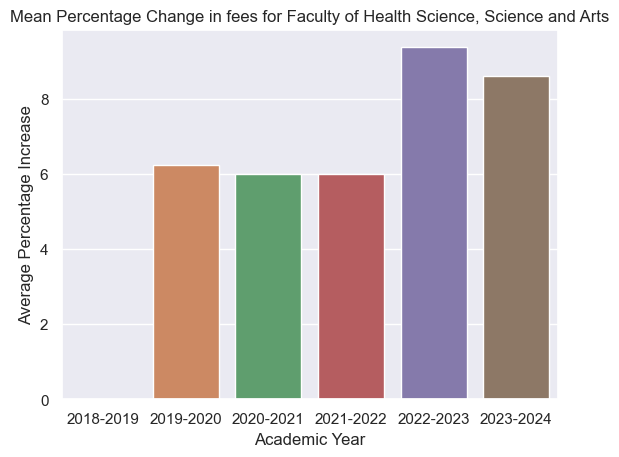

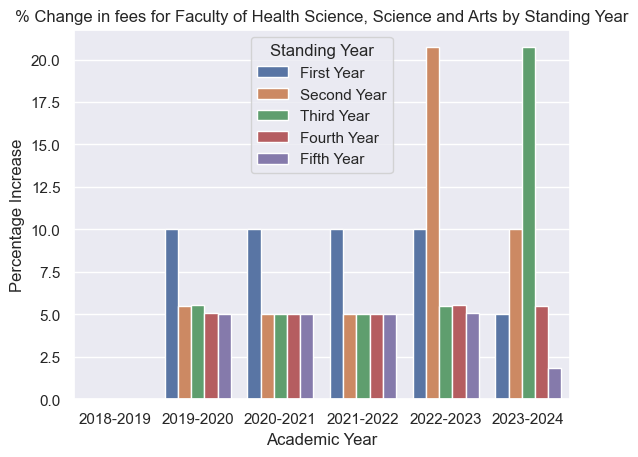

In [439]:
sns.barplot(data=health_pct_df,x='Academic Year',y='Average Percentage Increase')
plt.title("Mean Percentage Change in fees for Faculty of Health Science, Science and Arts")
plt.savefig('figures/health_pct_avg.png',format='png')
plt.show()
sns.barplot(data=health_pct_df.loc[:,health_pct_df.columns != 'Average Percentage Increase'].melt(id_vars='Academic Year',value_name='Percentage Increase',var_name='Standing Year'),x='Academic Year',y='Percentage Increase',hue='Standing Year')
plt.title("% Change in fees for Faculty of Health Science, Science and Arts by Standing Year")
plt.savefig('figures/health_pct_standing.png',format='png')
plt.show()

In [449]:
it_pct_df.drop('Fifth Year',axis=1, inplace=True)
it_pct_df['Average Percentage Increase'] = it_pct_df.loc[:,it_pct_df.columns != 'Academic Year'].mean(axis=1)
it_pct_df

,Academic Year,First Year,Second Year,Third Year,Fourth Year,Average Percentage Increase
0,2018-2019,NaN,NaN,NaN,NaN,NaN
1,2019-2020,10.000000,5.101956,5.102055,5.255484,6.364874
2,2020-2021,9.999953,4.999967,4.999950,4.999934,6.249951
3,2021-2022,9.999950,4.999992,4.999972,4.999953,6.249967
4,2022-2023,14.999954,20.725496,5.101966,5.102054,11.482368
5,2023-2024,4.999986,15.000003,20.725480,5.101953,11.456856


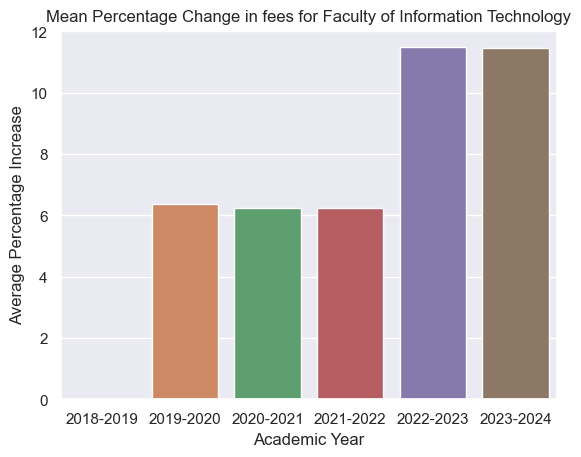

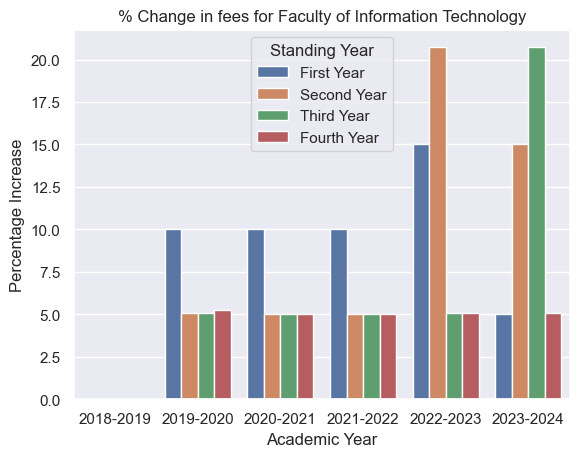

In [450]:
sns.barplot(data=it_pct_df,x='Academic Year',y='Average Percentage Increase')
plt.title("Mean Percentage Change in fees for Faculty of Information Technology")
plt.savefig('figures/it_pct_avg.png',format='png')
plt.show()
sns.barplot(data=it_pct_df.loc[:,it_pct_df.columns != 'Average Percentage Increase'].melt(id_vars='Academic Year',value_name='Percentage Increase',var_name='Standing Year'),x='Academic Year',y='Percentage Increase',hue='Standing Year')
plt.title("% Change in fees for Faculty of Information Technology")
plt.savefig('figures/it_pct_standing.png',format='png')
plt.show()

In [447]:
# nursing_pct_df.drop('Fifth Year',axis=1, inplace=True)
nursing_pct_df['Average Percentage Increase'] = nursing_pct_df.loc[:,nursing_pct_df.columns != 'Academic Year'].mean(axis=1)
nursing_pct_df

,Academic Year,First Year,Second Year,Third Year,Fourth Year,Average Percentage Increase
0,2018-2019,NaN,NaN,NaN,NaN,NaN
1,2019-2020,9.999961,5.101963,5.101994,5.102122,2.073450
2,2020-2021,9.999973,4.999963,4.873361,4.999920,6.218304
3,2021-2022,9.999927,4.999982,5.126665,4.997904,6.281119
4,2022-2023,9.999941,20.725537,5.102032,5.104023,10.232883
5,2023-2024,4.999936,9.999944,20.725508,5.101993,10.206845


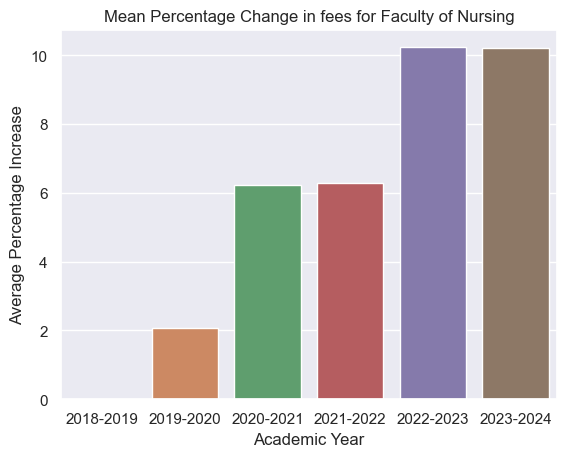

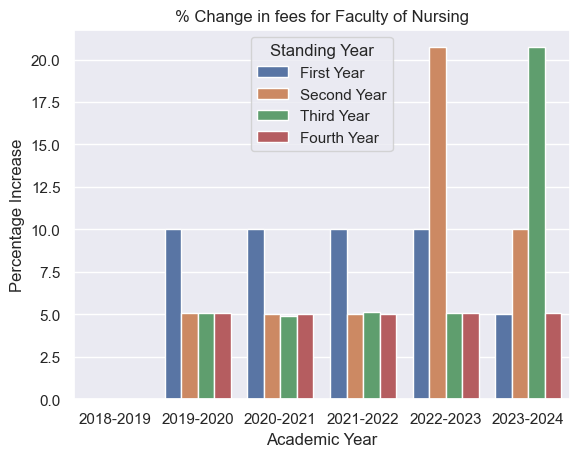

In [448]:
sns.barplot(data=nursing_pct_df,x='Academic Year',y='Average Percentage Increase')
plt.title("Mean Percentage Change in fees for Faculty of Nursing")
plt.savefig('figures/nursing_pct_avg.png',format='png')
plt.show()
sns.barplot(data=nursing_pct_df.loc[:,nursing_pct_df.columns != 'Average Percentage Increase'].melt(id_vars='Academic Year',value_name='Percentage Increase',var_name='Standing Year'),x='Academic Year',y='Percentage Increase',hue='Standing Year')
plt.title("% Change in fees for Faculty of Nursing")
plt.savefig('figures/nursing_pct_standing.png',format='png')
plt.show()

In [486]:
average_df.to_csv('proc_data/average_faculty.csv')

In [487]:
pct_average_df.to_csv('proc_data/average_pct_faculty.csv')

In [488]:
commerce_pct_df.to_csv('proc_data/commerce_pct.csv')
cs_pct_df.to_csv('proc_data/cs_pct.csv')
eng_pct_df.to_csv('proc_data/eng_pct.csv')
health_pct_df.to_csv('proc_data/health_pct.csv')
it_pct_df.to_csv('proc_data/it_pct.csv')
nursing_pct_df.to_csv('proc_data/nursing.csv')